In [10]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
import pathlib

In [36]:
def create_map_dvsv(distance_cones_straight, cones_on_straight, track_width, turn_radius, blue_cones_turn, yellow_cones_turn, centerline_points_turn):
    blue_cones = np.array([[0, track_width/2]])
    yellow_cones = np.array([[0, -track_width/2]])

    centerline = np.array([[0, 0]])

    straight_length = distance_cones_straight * cones_on_straight

    # straight; cones_on_straight amount of cones with spacing of distance_cones_straight
    for i in range(1, cones_on_straight + 1):
        blue_cones = np.append(blue_cones, [[i*distance_cones_straight, track_width/2]], axis=0)
        yellow_cones = np.append(yellow_cones, [[i*distance_cones_straight, -track_width/2]], axis=0)
        centerline = np.append(centerline, [[i*distance_cones_straight, 0]], axis=0)
    
    # left turn of 180 degrees with radius turn_radius
    inner_radius = turn_radius - track_width/2
    angle = np.linspace(-np.pi/2, np.pi/2, blue_cones_turn)
    x = inner_radius*np.cos(angle) + straight_length + distance_cones_straight
    y = inner_radius*np.sin(angle) + turn_radius
    blue_cones = np.append(blue_cones, np.column_stack((x, y)), axis=0)

    angle = np.linspace(-np.pi/2, np.pi/2, yellow_cones_turn)
    outer_radius = turn_radius + track_width/2
    x = outer_radius*np.cos(angle) + straight_length + distance_cones_straight
    y = outer_radius*np.sin(angle) + turn_radius
    yellow_cones = np.append(yellow_cones, np.column_stack((x, y)), axis=0)

    angle = np.linspace(-np.pi/2, np.pi/2, centerline_points_turn)
    x = turn_radius*np.cos(angle) + straight_length + distance_cones_straight
    y = turn_radius*np.sin(angle) + turn_radius
    centerline = np.append(centerline, np.column_stack((x, y)), axis=0)

    # reverse straight; cones_on_straight amount of cones with spacing of distance_cones_straight
    for i in range(0, cones_on_straight + 1):
        blue_cones = np.append(blue_cones, [[straight_length - i*distance_cones_straight, -track_width/2 + turn_radius*2, ]], axis=0)
        yellow_cones = np.append(yellow_cones, [[straight_length - i*distance_cones_straight, +track_width/2 + turn_radius*2]], axis=0)
        centerline = np.append(centerline, [[straight_length - i*distance_cones_straight, +turn_radius*2]], axis=0)


    return blue_cones, yellow_cones, centerline

(-2.117783682680799, 44.47345733629678, -2.45, 18.45)

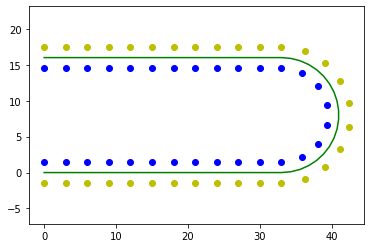

In [37]:
distance_cones_straight = 3
cones_on_straight = 10 # so 30m

track_width = 3

turn_radius = 8
blue_cones_turn = 8
yellow_cones_turn = 10
centerline_points_turn = 20

blue_cones, yellow_cones, centerline = create_map_dvsv(distance_cones_straight, cones_on_straight, track_width, turn_radius, blue_cones_turn, yellow_cones_turn, centerline_points_turn)

plt.plot(blue_cones[:,0], blue_cones[:,1], 'bo')
plt.plot(yellow_cones[:,0], yellow_cones[:,1], 'yo')
plt.plot(centerline[:,0], centerline[:,1], 'g')
plt.axis('equal')
# plt.ylim(25, 50)

In [38]:
# Save in ROS format to YAML file
all_cones = []

# Iterate over blue cone locations and create YAML entries
for cone in blue_cones:
    cone_entry = {
        "covariance": [0.0] * 9,
        "observation": {
            "belief": 1,
            "location": {"x": float(cone[0]), "y": float(cone[1]), "z": 0},
            "observation_class": 0,
        },
    }
    all_cones.append(cone_entry)

# Iterate over yellow cone locations and create YAML entries
for cone in yellow_cones:
    cone_entry = {
        "covariance": [0.0] * 9,
        "observation": {
            "belief": 1,
            "location": {"x": float(cone[0]), "y": float(cone[1]), "z": 0},
            "observation_class": 1,
        },
    }
    all_cones.append(cone_entry)

# Create the final YAML data structure
data = {
    "header": {
        "frame_id": "ugr/map",
        "seq": 0,
        "stamp": {"nsecs": 0, "secs": 0},
    },
    "observations": all_cones,
}


filename = "map_dvsv.yaml"

with open(filename, "w") as file:
    yaml.dump(data, file)

In [39]:
all_poses = []

# Iterate over path poses and create YAML entries
for pose in centerline:
    pose_entry = {
        "header": {
            "frame_id": "ugr/map",
            "seq": 0,
            "stamp": {"nsecs": 0, "secs": 0},
        },
        "pose": {
            "position": {"x": float(pose[0]), "y": float(pose[1]), "z": 0},
            "orientation": {"x": 0, "y": 0, "z": 0, "w": 1},
        },
    }
    all_poses.append(pose_entry)

# Create the final YAML data structure
data = {
    "header": {
        "frame_id": "ugr/map",
        "seq": 0,
        "stamp": {"nsecs": 0, "secs": 0},
    },
    "poses": all_poses,
}

filename = "centerline_dvsv.yaml"

with open(filename, "w") as file:
    yaml.dump(data, file)